# CHAPTER 3: PROBABILITY DISTRIBUTIONS IN ENGINEERING
**(Week 5-6: Lecture Notes)**

---

## 1. INTRODUCTION: WHAT IS A RANDOM VARIABLE?
A function that converts the outcome of an experiment into a numerical value is called a **Random Variable**. It is usually denoted by **X**.

In engineering, there are two types of data (and thus two types of distributions):

### 1. Discrete Distributions
Events that we can count one by one.
* **Example:** Number of defective screws (can be 3, but not 3.5).
* **Common Types:** Bernoulli, Binomial, Poisson.

### 2. Continuous Distributions
Events that are found by measurement and can have decimal values.
* **Example:** The lifespan of an electronic component (can be 100.5 hours).
* **Common Types:** Exponential, Normal (Gaussian).


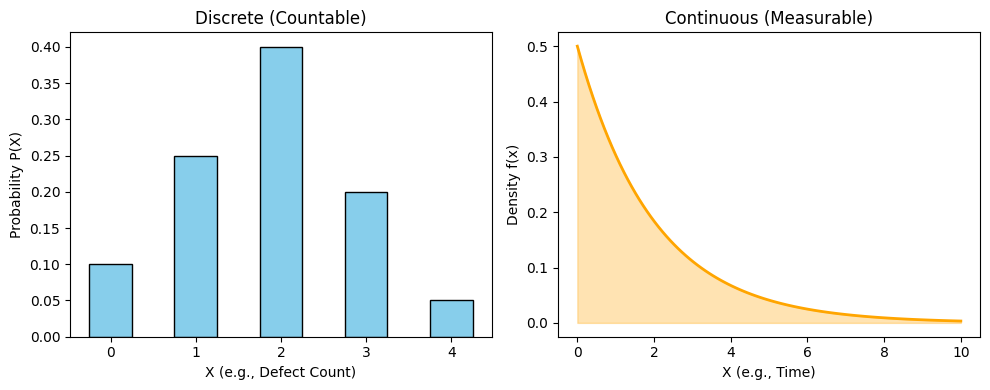

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Visualization: Discrete vs Continuous
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Discrete
ax1.bar([0,1,2,3,4], [0.1, 0.25, 0.4, 0.2, 0.05], color='skyblue', edgecolor='black', width=0.5)
ax1.set_title("Discrete (Countable)")
ax1.set_xlabel("X (e.g., Defect Count)")
ax1.set_ylabel("Probability P(X)")

# Continuous
x = np.linspace(0, 10, 100)
y = np.exp(-x/2) / 2 # Exponential shape
ax2.plot(x, y, color='orange', linewidth=2)
ax2.fill_between(x, y, color='orange', alpha=0.3)
ax2.set_title("Continuous (Measurable)")
ax2.set_xlabel("X (e.g., Time)")
ax2.set_ylabel("Density f(x)")

plt.tight_layout()
plt.show()


## 2. DISCRETE DISTRIBUTIONS - 1: BERNOULLI AND BINOMIAL
These distributions model processes where the answer is "Yes/No" or "Success/Failure".

### 2.1. Bernoulli Distribution (The Foundation)
Only a single trial is performed.
* **Outcomes:** Success (1) or Failure (0).
* **p:** Probability of Success.
* **q:** Probability of Failure ($q = 1 - p$).
* *Example:* Flipping a coin once. (Probability of Heads $p=0.5$).

### 2.2. Binomial Distribution (Repeated Bernoulli)
If we repeat the Bernoulli experiment **n** times without changing the conditions, it becomes a Binomial distribution.

**Scenario:** "10% of parts produced in a factory are defective. What is the probability that exactly 3 out of 20 randomly selected parts are defective?"

#### The Binomial Formula:
$$P(X = x) = C(n, x) \cdot p^x \cdot q^{(n-x)}$$

* **n:** Total number of trials.
* **x:** Number of desired successes (or defects).
* **p:** Probability of success in a single trial.
* **q:** Probability of failure (1-p).
* **C(n, x):** Combination. (How many different ways can we choose x items out of n?).

#### Combination Calculation:
$$C(n, x) = \frac{n!}{x! \cdot (n-x)!}$$

---

### 2.3. Numerical Example (Quality Control)
In a production line, the probability of a part being defective is $p = 0.2$ (i.e., 20%).
We randomly select $n = 5$ parts.

**Question:** What is the probability that exactly **1** of them is defective?

**Given:**
* $n = 5$
* $x = 1$
* $p = 0.2$
* $q = 0.8$

**Manual Calculation:**
1.  **Combination:** $C(5, 1) = 5! / (1! \cdot 4!) = 5$.
2.  **Probabilities:** $(0.2)^1 \cdot (0.8)^4$
3.  **Result:** $5 \cdot 0.2 \cdot 0.4096 = 0.4096$
    *(So, there is a 41% chance that 1 out of 5 parts is defective).*


In [2]:
import math

def binomial_prob(n, x, p):
    comb = math.factorial(n) // (math.factorial(x) * math.factorial(n - x))
    return comb * (p**x) * ((1-p)**(n-x))

# Example Solution
n_ex = 5
x_ex = 1
p_ex = 0.2
result = binomial_prob(n_ex, x_ex, p_ex)

print(f"Binomial Problem Solution:")
print(f"n={n_ex}, x={x_ex}, p={p_ex}")
print(f"P(X=1) = {result:.4f} ({result*100:.1f}%)")


Binomial Problem Solution:
n=5, x=1, p=0.2
P(X=1) = 0.4096 (41.0%)


### 2.4. Mean and Variance of Binomial
What do we expect in the long run?
* **Mean (Expected Value):** $\mu = n \cdot p$
* **Variance:** $\sigma^2 = n \cdot p \cdot q$


## 3. DISCRETE DISTRIBUTIONS - 2: POISSON DISTRIBUTION
Used when **n is very large** or the event is spread over time/space. Also called the **"Distribution of Rare Events"**.

**Scenarios:**
* Calls to a call center per minute.
* Cracks per square meter in concrete.
* Annual pipe bursts in a city network.

### 3.1. Single Parameter: Lambda ($\lambda$)
* **$\lambda$:** Average number of events occurring per unit of time (or area).

### 3.2. Poisson Formula
$$P(X = x) = \frac{e^{-\lambda} \cdot \lambda^x}{x!}$$

* **e:** Euler's number ($\approx 2.718$).

---

### 3.3. Numerical Example (Earthquake Risk)
Average of 3 earthquakes per year ($\lambda = 3$).

**Question 1:** Probability of **no** earthquakes ($x=0$) next year?
$$P(X=0) = \frac{e^{-3} \cdot 3^0}{0!} = \frac{0.0498 \cdot 1}{1} = 0.0498$$
*(~5% chance)*.

**Question 2:** Probability of exactly **2** earthquakes?
$$P(X=2) = \frac{e^{-3} \cdot 3^2}{2!} = \frac{0.0498 \cdot 9}{2} = 0.224$$
*(~22.4% chance)*.

### 3.4. Difference Between Poisson and Binomial
* **Binomial:** "I took 10 shots, how many were goals?" (Fixed **n**).
* **Poisson:** "How many goals will be scored in the match?" (No fixed n, uses **average $\lambda$**).


Poisson Problem (Lambda=3):
P(X=0) = 0.0498
P(X=2) = 0.2240


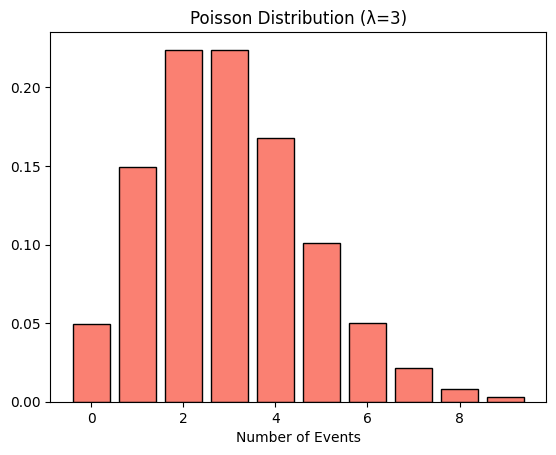

In [3]:
def poisson_prob(lam, x):
    return (math.exp(-lam) * (lam**x)) / math.factorial(x)

lam = 3
p0 = poisson_prob(lam, 0)
p2 = poisson_prob(lam, 2)

print(f"Poisson Problem (Lambda={lam}):")
print(f"P(X=0) = {p0:.4f}")
print(f"P(X=2) = {p2:.4f}")

# Plotting Poisson
x_vals = list(range(10))
y_vals = [poisson_prob(lam, x) for x in x_vals]
plt.bar(x_vals, y_vals, color='salmon', edgecolor='black')
plt.title(f"Poisson Distribution (λ={lam})")
plt.xlabel("Number of Events")
plt.show()


## 4. TRANSITION TO CONTINUOUS DISTRIBUTIONS: THE PDF CONCEPT
When moving from the discrete world (1, 2, 3...) to the continuous world (1.5, 2.71...), the rules change.

**CRITICAL RULE:** In continuous distributions, the probability of being **exactly x** is ZERO.
* *Example:* Probability of a light bulb lasting exactly 1000.0000... hours is 0.
* Therefore, we look at **Interval Probability** (e.g., between 990 and 1010 hours).

**Probability Density Function (PDF - f(x)):**
This is a curve. The **AREA** under the curve gives the probability. Total area is 1.


## 5. CONTINUOUS DISTRIBUTIONS - 1: EXPONENTIAL DISTRIBUTION
Foundation of **Reliability** analysis in engineering. The "brother" of Poisson.

* **Poisson:** "How many events in a fixed time?" (Counts).
* **Exponential:** "How much time until the next event?" (Measures time).

**Use Cases:**
* Time until an electronic part fails.
* Waiting time for a customer to arrive.

### 5.1. Exponential Distribution Formulas
Let the average event rate be $\lambda$.

**1. Probability Density Function (PDF):**
$$f(t) = \lambda e^{-\lambda t} \quad (t \ge 0)$$
*(Draws the curve).*

**2. Cumulative Distribution Function (CDF):**
Probability of event happening **BEFORE** time t (Probability of failure before t):
$$P(T \le t) = 1 - e^{-\lambda t}$$

**3. Reliability Function:**
Probability of lasting **LONGER** than time t:
$$P(T > t) = e^{-\lambda t}$$

---

### 5.2. Numerical Example (Warranty Period)
An electronic sensor has an average life of 5 years.
Rate $\lambda = 1/5 = 0.2$ per year.

**Question 1:** Probability of failing **before 3 years**?
$$P(T \le 3) = 1 - e^{-0.2 \cdot 3} = 1 - e^{-0.6}$$
$$1 - 0.5488 = 0.4512$$
*(45% chance it fails before 3 years).*

**Question 2:** Probability of lasting **longer than 10 years**?
$$P(T > 10) = e^{-0.2 \cdot 10} = e^{-2} \approx 0.135$$
*(13.5% chance it survives).*

### 5.3. Memoryless Property
"The past is the past." If a bulb has worked for 1000 hours, the probability of it failing in the next second is the same as a brand new bulb. It does not "age" (used for random failures, not wear-out).


Exponential Problem (Lambda=0.2):
P(T <= 3) Fail before 3 years: 0.4512
P(T > 10) Survive 10+ years: 0.1353


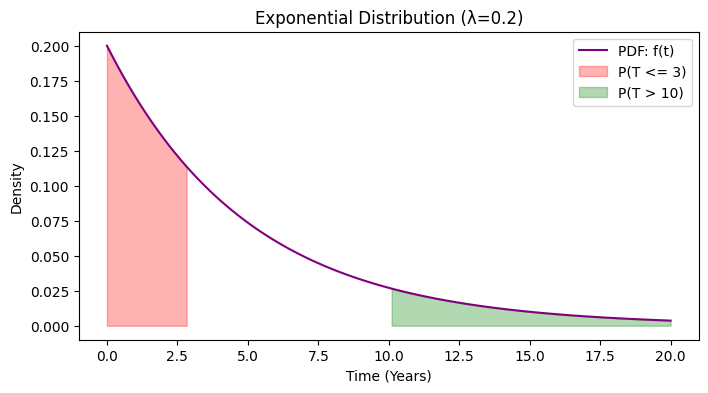

In [4]:
def exponential_cdf(lam, t):
    return 1 - math.exp(-lam * t)

def exponential_reliability(lam, t):
    return math.exp(-lam * t)

lam_exp = 0.2

# Q1: Fail before 3 years
prob_fail_3 = exponential_cdf(lam_exp, 3)
# Q2: Last longer than 10 years
prob_survive_10 = exponential_reliability(lam_exp, 10)

print(f"Exponential Problem (Lambda={lam_exp}):")
print(f"P(T <= 3) Fail before 3 years: {prob_fail_3:.4f}")
print(f"P(T > 10) Survive 10+ years: {prob_survive_10:.4f}")

# Plotting Exponential PDF
t_vals = np.linspace(0, 20, 100)
pdf_vals = lam_exp * np.exp(-lam_exp * t_vals)

plt.figure(figsize=(8, 4))
plt.plot(t_vals, pdf_vals, color='purple', label='PDF: f(t)')
plt.fill_between(t_vals, pdf_vals, where=(t_vals <= 3), color='red', alpha=0.3, label='P(T <= 3)')
plt.fill_between(t_vals, pdf_vals, where=(t_vals > 10), color='green', alpha=0.3, label='P(T > 10)')
plt.title(f"Exponential Distribution (λ={lam_exp})")
plt.xlabel("Time (Years)")
plt.ylabel("Density")
plt.legend()
plt.show()


## 6. Lecture Summary
These two distributions are two sides of the same coin.

**Scenario:** Buses arriving at a bus stop.

| Feature | Poisson Distribution | Exponential Distribution |
| :--- | :--- | :--- |
| **Question Type** | "How many buses in 1 hour?" | "When will the next bus arrive?" |
| **Variable (X)** | Discrete Count (0, 1, 2...) | Continuous Time (5.2 min...) |
| **Focus** | Count / Quantity | Time / Duration |
| **Engineering** | Number of Defects, Accidents | Part Lifespan, Repair Time |

---

### Quick Hints for Problems:
* **Binomial:** If problem says "took **n** samples", "**x** are defective" -> **100% Binomial**.
* **Poisson:** If there is **no "n"**, but "**average rate ($\lambda$)**" is given and asks "how many" -> **Poisson**.
* **Exponential:** If problem mentions "**lifespan**", "**waiting time**", "**duration**" -> **Exponential**.

*Tip: Learn to find the 'e' number on your calculator.*
